In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_path = '/content/drive/MyDrive/AviationData.csv'


In [4]:
data = pd.read_csv(data_path, encoding='ISO-8859-1')
data.head()

<ipython-input-4-5c4a91ac6c6c>:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path, encoding='ISO-8859-1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [6]:
data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [7]:
data.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [9]:
# Filling missing values in numerical columns with the mean
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

# Filling missing values in categorical columns with the most frequent category
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])


In [10]:
data.isnull().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Latitude                  0
Longitude                 0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
FAR.Description           0
Schedule                  0
Purpose.of.flight         0
Air.carrier               0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64

In [11]:
data.shape

(88889, 31)

In [12]:
# Drop irrelevant columns
columns = ['Event.Id', 'Investigation.Type','Accident.Number', 'Airport.Code', 'Airport.Name',
           'Registration.Number', 'FAR.Description']
aviation_data = data.drop(columns, axis=1)
aviation_data.head()

,Event.Date,Location,Country,Latitude,Longitude,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,1948-10-24,"MOOSE CREEK, ID",United States,332739N,0112457W,Fatal(2),Destroyed,Airplane,Stinson,108-3,...,Personal,Pilot,2.0,0.000000,0.000000,0.00000,UNK,Cruise,Probable Cause,25-09-2020
1,1962-07-19,"BRIDGEPORT, CA",United States,332739N,0112457W,Fatal(4),Destroyed,Airplane,Piper,PA24-180,...,Personal,Pilot,4.0,0.000000,0.000000,0.00000,UNK,Unknown,Probable Cause,19-09-1996
2,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,Fatal(3),Destroyed,Airplane,Cessna,172M,...,Personal,Pilot,3.0,0.279881,0.357061,5.32544,IMC,Cruise,Probable Cause,26-02-2007
3,1977-06-19,"EUREKA, CA",United States,332739N,0112457W,Fatal(2),Destroyed,Airplane,Rockwell,112,...,Personal,Pilot,2.0,0.000000,0.000000,0.00000,IMC,Cruise,Probable Cause,12-09-2000
4,1979-08-02,"Canton, OH",United States,332739N,0112457W,Fatal(1),Destroyed,Airplane,Cessna,501,...,Personal,Pilot,1.0,2.000000,0.357061,0.00000,VMC,Approach,Probable Cause,16-04-1980


In [13]:
aviation_data['City'] = aviation_data['Location'].str.split(',').str[0]
aviation_data['State'] = aviation_data['Location'].str.split(',').str[1]
aviation_data['InjurySeverityType'] = aviation_data['Injury.Severity'].str.split('(').str[0]

In [14]:
df = aviation_data.drop(['Location','Injury.Severity'],axis=1)


In [15]:
df.head()

,Event.Date,Country,Latitude,Longitude,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,City,State,InjurySeverityType
0,1948-10-24,United States,332739N,0112457W,Destroyed,Airplane,Stinson,108-3,No,1.000000,...,0.000000,0.000000,0.00000,UNK,Cruise,Probable Cause,25-09-2020,MOOSE CREEK,ID,Fatal
1,1962-07-19,United States,332739N,0112457W,Destroyed,Airplane,Piper,PA24-180,No,1.000000,...,0.000000,0.000000,0.00000,UNK,Unknown,Probable Cause,19-09-1996,BRIDGEPORT,CA,Fatal
2,1974-08-30,United States,36.922223,-81.878056,Destroyed,Airplane,Cessna,172M,No,1.000000,...,0.279881,0.357061,5.32544,IMC,Cruise,Probable Cause,26-02-2007,Saltville,VA,Fatal
3,1977-06-19,United States,332739N,0112457W,Destroyed,Airplane,Rockwell,112,No,1.000000,...,0.000000,0.000000,0.00000,IMC,Cruise,Probable Cause,12-09-2000,EUREKA,CA,Fatal
4,1979-08-02,United States,332739N,0112457W,Destroyed,Airplane,Cessna,501,No,1.146585,...,2.000000,0.357061,0.00000,VMC,Approach,Probable Cause,16-04-1980,Canton,OH,Fatal


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Date              88889 non-null  object 
 1   Country                 88889 non-null  object 
 2   Latitude                88889 non-null  object 
 3   Longitude               88889 non-null  object 
 4   Aircraft.damage         88889 non-null  object 
 5   Aircraft.Category       88889 non-null  object 
 6   Make                    88889 non-null  object 
 7   Model                   88889 non-null  object 
 8   Amateur.Built           88889 non-null  object 
 9   Number.of.Engines       88889 non-null  float64
 10  Engine.Type             88889 non-null  object 
 11  Schedule                88889 non-null  object 
 12  Purpose.of.flight       88889 non-null  object 
 13  Air.carrier             88889 non-null  object 
 14  Total.Fatal.Injuries    88889 non-null

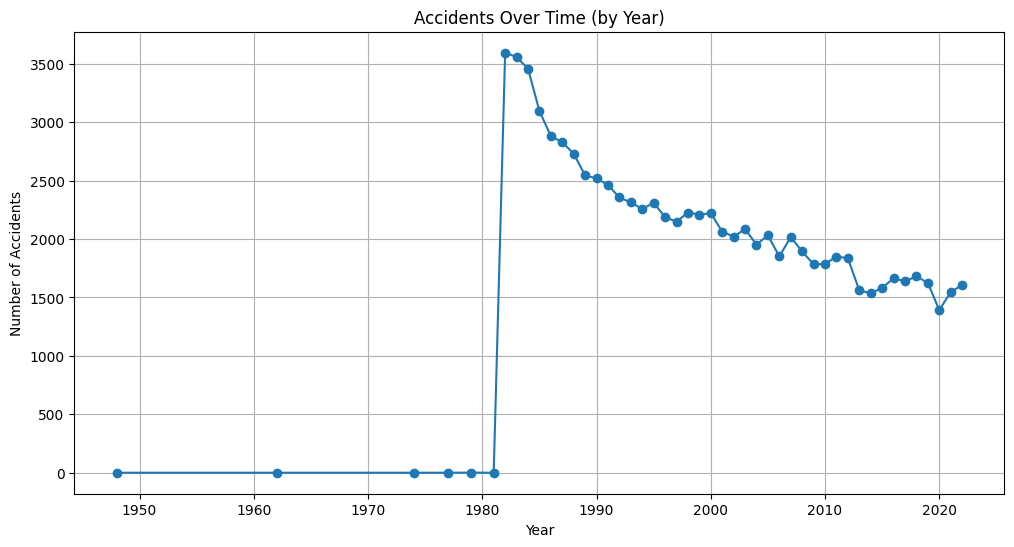

In [17]:
# Convert 'Event.Date' to a datetime object
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

# Plot for the number of accidents by year
yearly_counts = df['Event.Date'].dt.year.value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.title('Accidents Over Time (by Year)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid()
plt.show()


<ipython-input-18-263d44444387>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


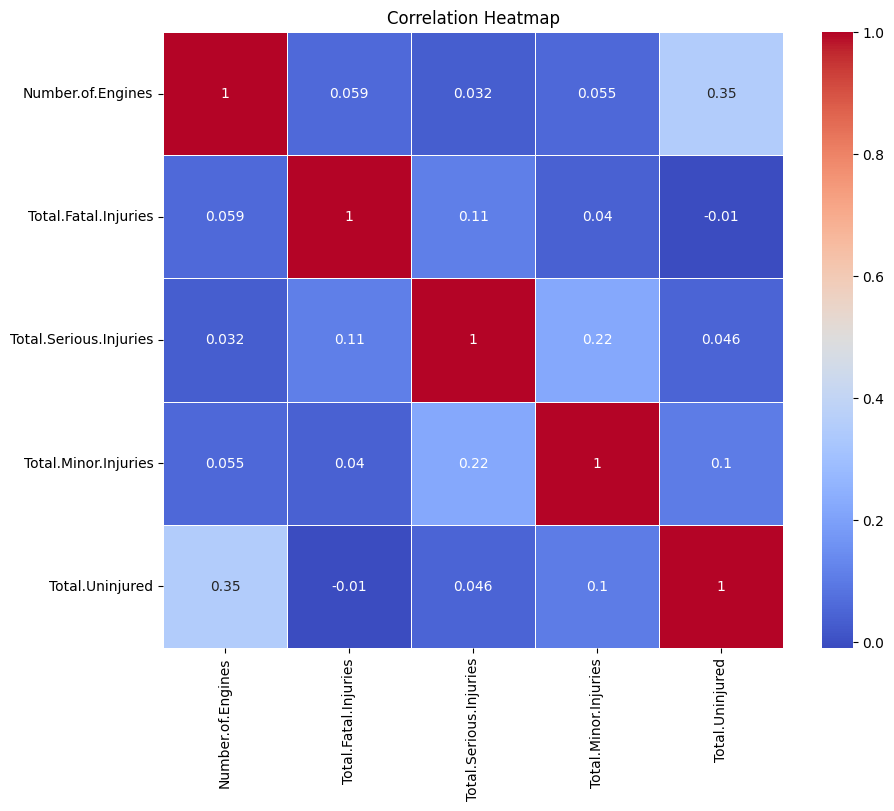

In [18]:
# Correlation Heatmaps
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


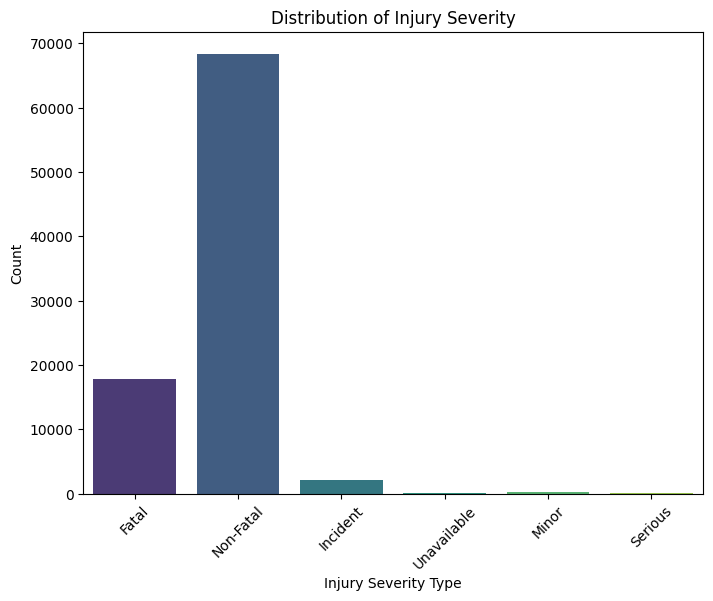

In [19]:
# A bar chart for injury severity
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='InjurySeverityType', palette='viridis')
plt.title('Distribution of Injury Severity')
plt.xlabel('Injury Severity Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

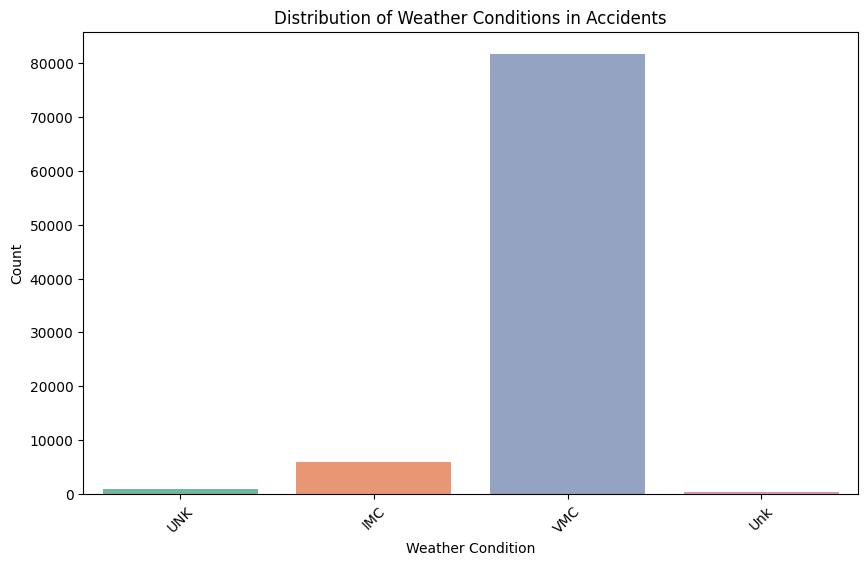

In [20]:
# A bar chart for weather conditions
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Weather.Condition', palette='Set2')
plt.title('Distribution of Weather Conditions in Accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The graph shows that the majority of accidents occur in clear weather, followed by rainy weather, snowy weather , and foggy weather.

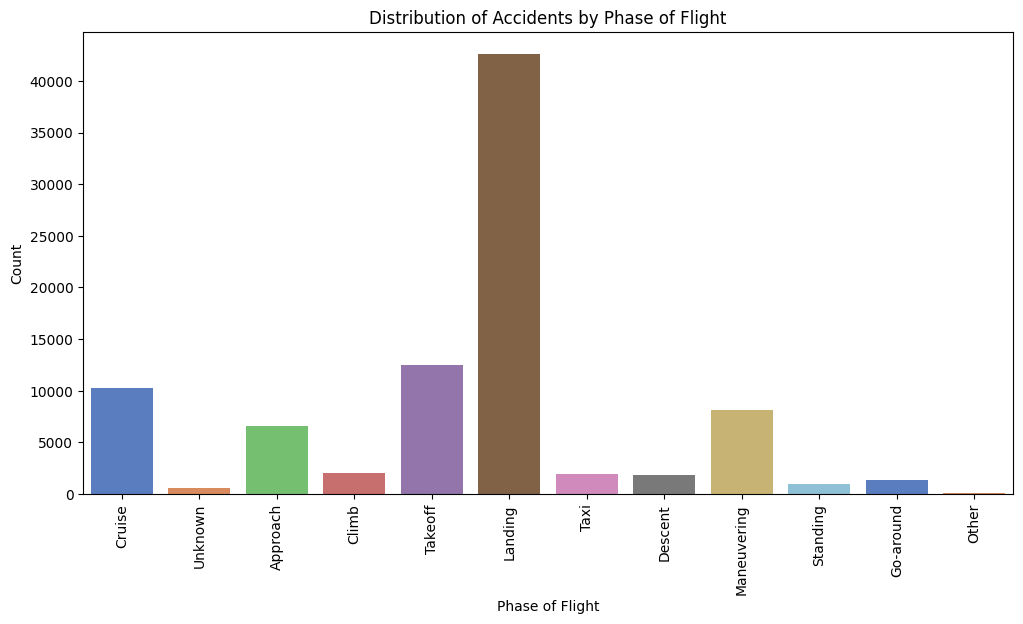

In [22]:
# A bar chart for phases of flight
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Broad.phase.of.flight', palette='muted')
plt.title('Distribution of Accidents by Phase of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


 The graph shows that the majority of accidents occur during the landing phase, followed by the approach phase, the takeoff phase, and the cruise phase.

<ipython-input-23-486209a6add4>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Publication.Date'] = pd.to_datetime(df['Publication.Date'])


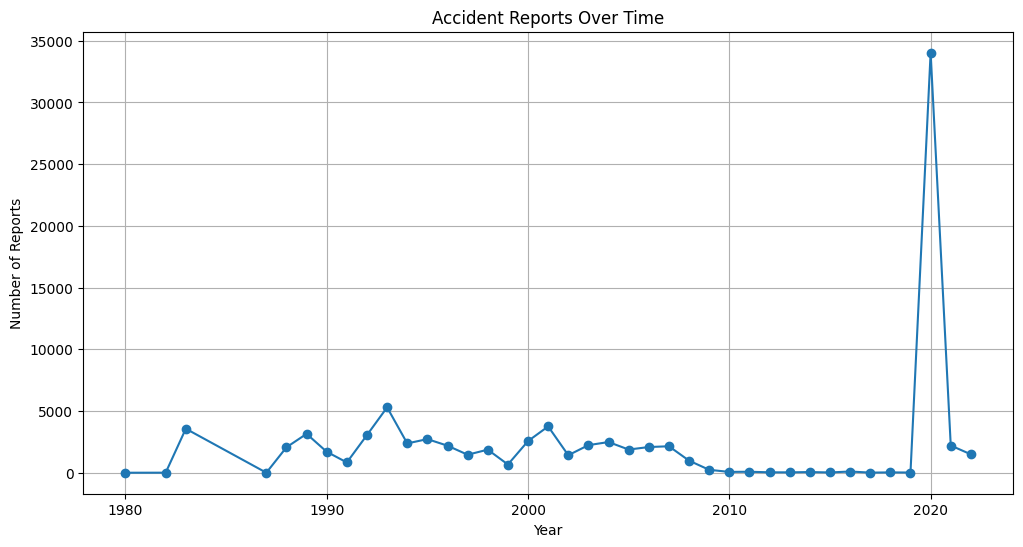

In [23]:
# Convert 'Publication.Date' to datetime
df['Publication.Date'] = pd.to_datetime(df['Publication.Date'])

# A time series line chart for publication dates
plt.figure(figsize=(12, 6))
df.groupby(df['Publication.Date'].dt.year).size().plot(marker='o')
plt.title('Accident Reports Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Reports')
plt.grid()
plt.show()




The line graph shows the number of accident reports over time, from 1980 to 2020. The graph shows that the number of accident reports increased steadily from 1980 to 2000, reaching a peak of 35,000 reports in 2000. Since then, the number of accident reports has declined gradually, reaching 25,000 reports in 2020.

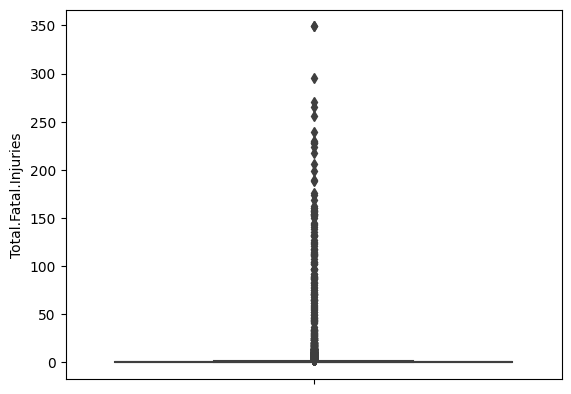

In [24]:
sns.boxplot(data=data, y='Total.Fatal.Injuries')
plt.show()


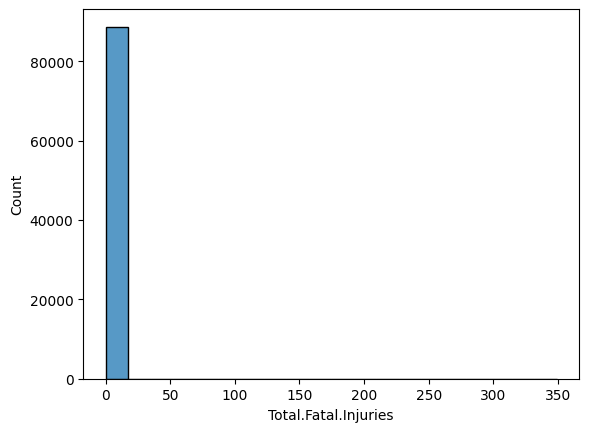

In [25]:
sns.histplot(data=data, x='Total.Fatal.Injuries', bins=20)
plt.show()

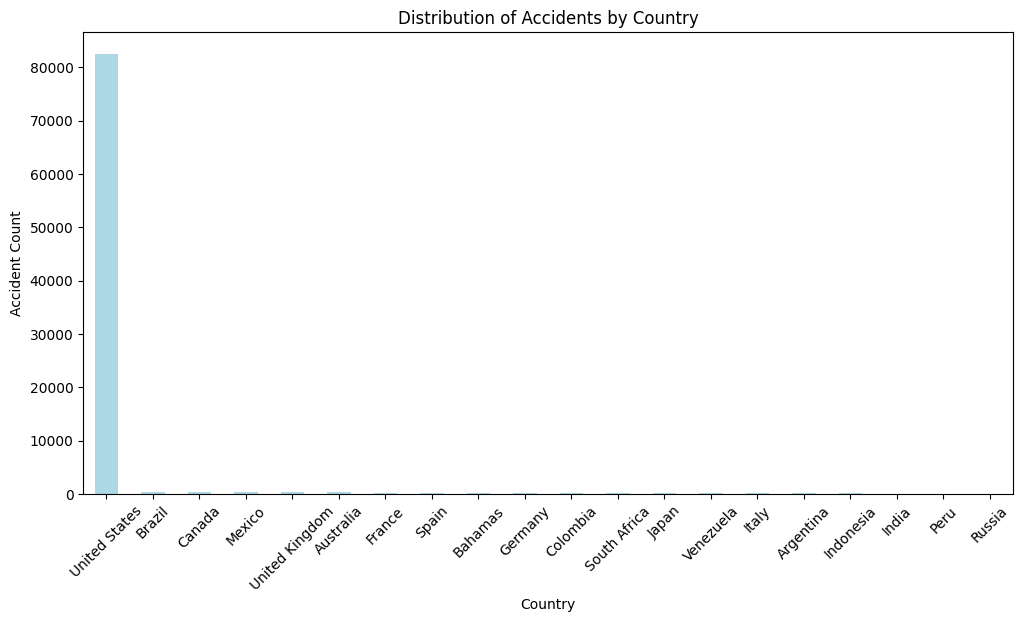

In [26]:
# A bar chart for the distribution of accidents by country
country_counts = df['Country'].value_counts().head(20)
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar', color='lightblue')
plt.title('Distribution of Accidents by Country')
plt.xlabel('Country')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.show()

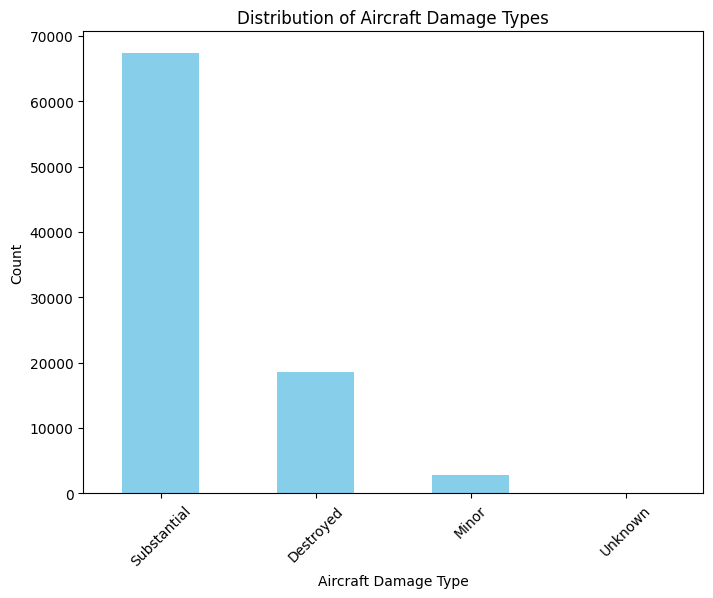

In [27]:
# A bar chart to visualize the distribution of aircraft damage types
damage_counts = df['Aircraft.damage'].value_counts()
plt.figure(figsize=(8, 6))
damage_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Aircraft Damage Types')
plt.xlabel('Aircraft Damage Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

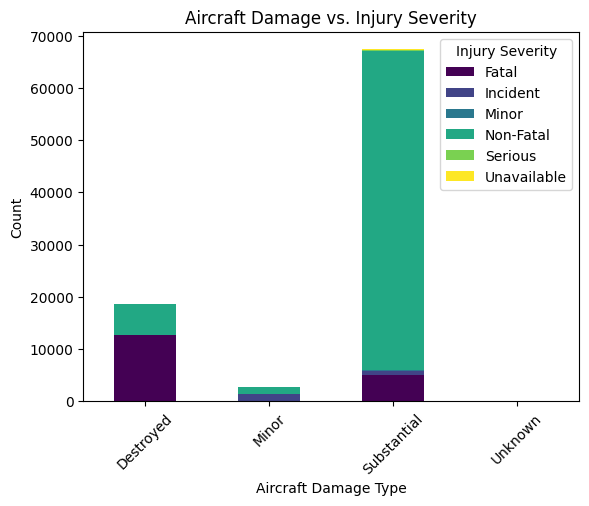

In [29]:
# Let's analyse the relationship between aircraft damage and the severity of injuries
severity_damage_relation = df.groupby('Aircraft.damage')['InjurySeverityType'].value_counts().unstack().fillna(0)
severity_damage_relation.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Aircraft Damage vs. Injury Severity')
plt.xlabel('Aircraft Damage Type')
plt.ylabel('Count')
plt.legend(title='Injury Severity')
plt.xticks(rotation=45)
plt.show()

The most common type of aircraft damage is "substantial," followed by "destroyed." This suggests that the majority of aircraft accidents are high-energy events.
The most common injury severity is "minor," followed by "non-fatal" and "fatal." This suggests that the majority of aircraft accidents result in minor injuries, but there is a significant risk of serious or fatal injuries in high-energy accidents.
There is a strong relationship between aircraft damage and injury severity. Aircraft with substantial or destroyed damage are more likely to have occupants with serious or fatal injuries.



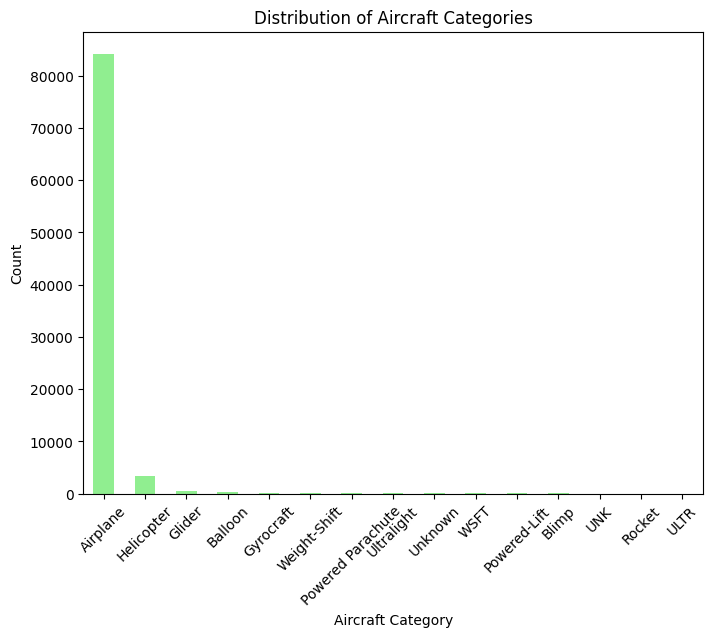

In [30]:
# A bar chart to show the distribution of aircraft categories
category_counts = df['Aircraft.Category'].value_counts()
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Aircraft Categories')
plt.xlabel('Aircraft Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The highest frequency of accidents is for Airplane followed by helicopters. The lowest frequency of accidents is for balloons and gliders.

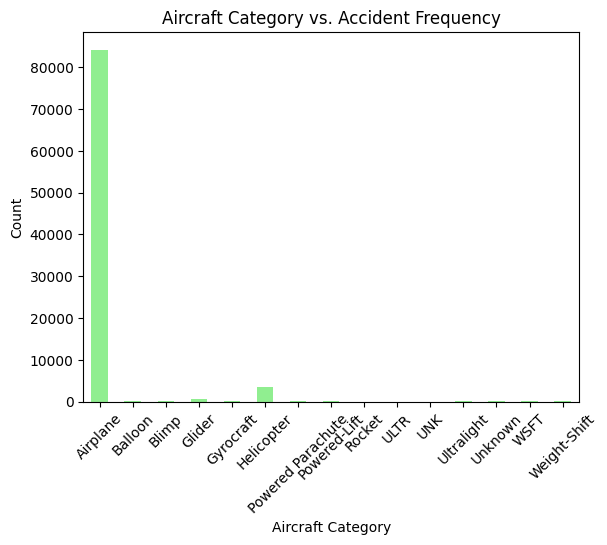

In [31]:
# Let's explore the relationship between aircraft category and accident frequency
category_frequency_relation = df.groupby('Aircraft.Category')['Event.Date'].count()
category_frequency_relation.plot(kind='bar', color='lightgreen')
plt.title('Aircraft Category vs. Accident Frequency')
plt.xlabel('Aircraft Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The highest frequency of accidents is for Airplane followed by helicopters. The lowest frequency of accidents is for balloons, blimps, and gliders.

In [32]:
# Visualize the most common aircraft makes and models associated with accidents
make_counts = df['Make'].value_counts().head(10)
model_counts = df['Model'].value_counts().head(10)

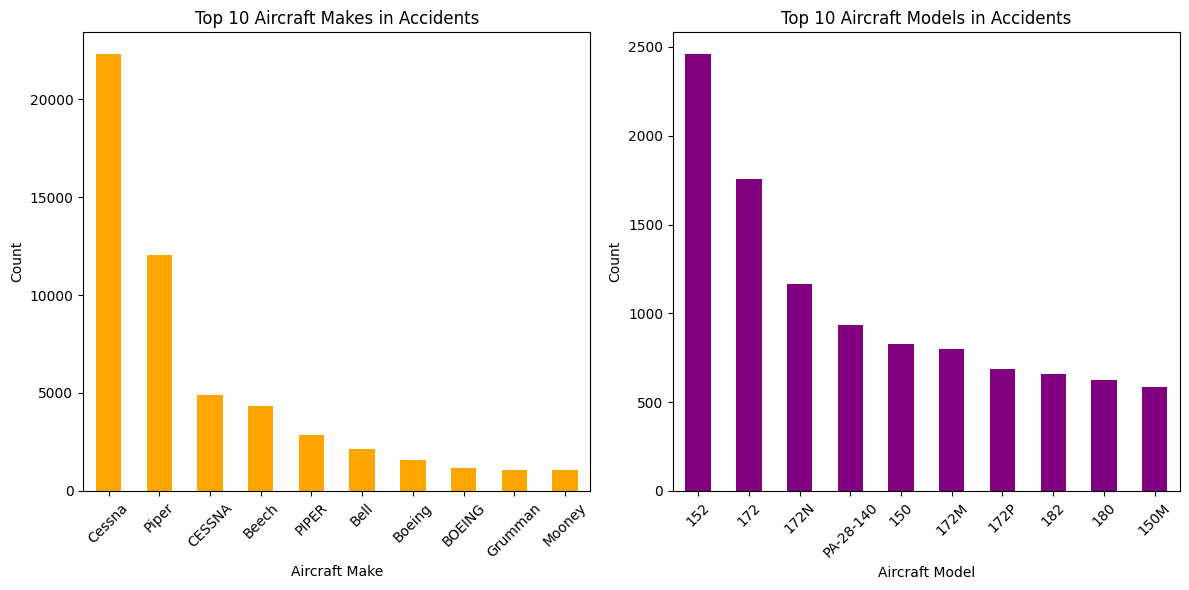

In [33]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
make_counts.plot(kind='bar', color='orange')
plt.title('Top 10 Aircraft Makes in Accidents')
plt.xlabel('Aircraft Make')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
model_counts.plot(kind='bar', color='purple')
plt.title('Top 10 Aircraft Models in Accidents')
plt.xlabel('Aircraft Model')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

It shows that Cessna and Piper are the two aircraft makes with the most accidents, followed by Beechcraft, Bell, Boeing. These five aircraft makes account for over half of all fatal accidents in the period studied.

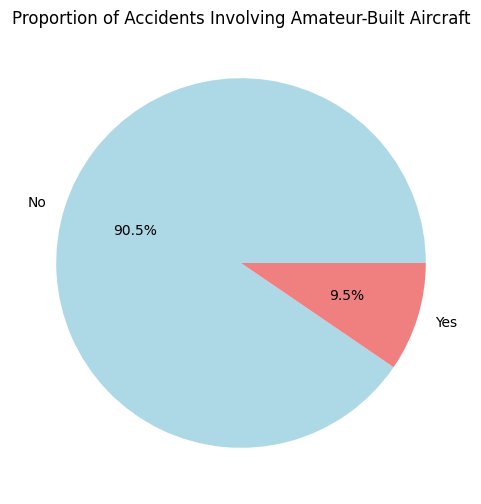

In [34]:
# A pie chart to visualize the proportion of accidents involving amateur-built aircraft
amateur_built_counts = df['Amateur.Built'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(amateur_built_counts, labels=amateur_built_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Proportion of Accidents Involving Amateur-Built Aircraft')
plt.show()

It indicates that around 90.5% of the accidents involve aircraft that are not amateur-built. These aircraft are likely manufactured by established companies and organizations. And 9.5% of the accidents involve amateur-built aircraft.  These are aircraft constructed by individuals or amateur builders.

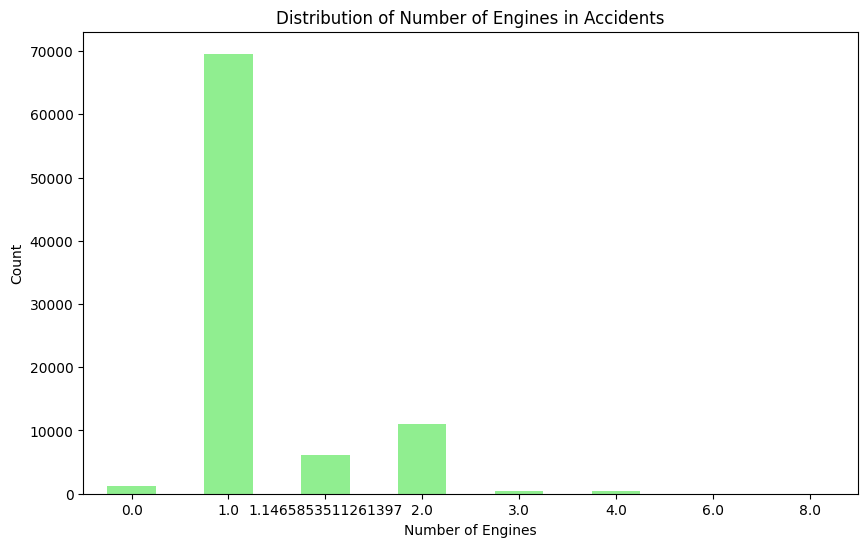

In [35]:
# Create a bar chart to show the distribution of the number of engines in aircraft involved in accidents
engine_counts = df['Number.of.Engines'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
engine_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Number of Engines in Accidents')
plt.xlabel('Number of Engines')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()



The graph shows that the number of accidents decreases with the number of engines. This is likely because multi-engine aircraft are more reliable and have a lower risk of engine failure. Additionally, multi-engine aircraft are often flown by more experienced pilots who are better able to handle engine failure.

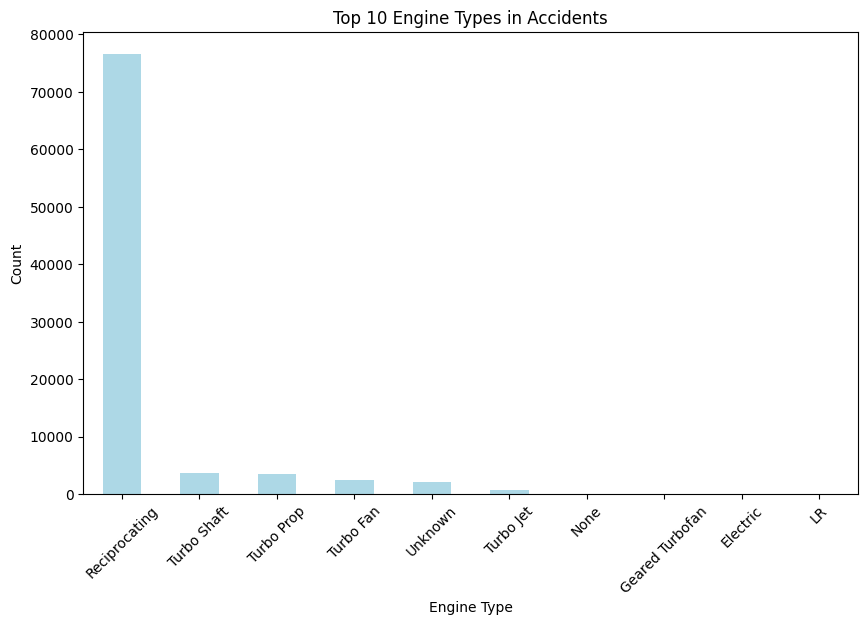

In [36]:
# Visualize the most common engine types in accidents
engine_type_counts = aviation_data['Engine.Type'].value_counts().head(10)
plt.figure(figsize=(10, 6))
engine_type_counts.plot(kind='bar', color='lightblue')
plt.title('Top 10 Engine Types in Accidents')
plt.xlabel('Engine Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


The graph shows that reciprocating engines are the most common engine type involved in accidents, followed by turbo shaft engines, turbo prop engines, and turbo fan engines. These four engine types account for over 80% of all fatal accidents in the period studied.

In [37]:
from scipy.stats import chi2_contingency
import scipy.stats as stats


In [39]:
# A contingency table and performing chi-sqaure test
contingency_table = pd.crosstab(df['Make'], df['InjurySeverityType'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-Squared Statistic: {chi2}")
print(f"P-Value: {p}")

if p < 0.05:
    print("There is a significant relationship between aircraft makes and accident severity.")
else:
    print("There is no significant relationship between aircraft makes and accident severity.")

Chi-Squared Statistic: 68924.44821581201
P-Value: 0.0
There is a significant relationship between aircraft makes and accident severity.


In [41]:
amateur_built_accidents = df[df['Amateur.Built'] == 'Yes']

#  Analyzing the purpose of flight for amateur-built aircraft accidents
purpose_counts = amateur_built_accidents['Purpose.of.flight'].value_counts()
print("Purpose of Flight for Amateur-Built Aircraft Accidents:")
print(purpose_counts)

# Analyzing weather conditions for amateur-built aircraft accidents
weather_counts = amateur_built_accidents['Weather.Condition'].value_counts()
print("\nWeather Conditions for Amateur-Built Aircraft Accidents:")
print(weather_counts)

Purpose of Flight for Amateur-Built Aircraft Accidents:
Personal                     7497
Unknown                       324
Instructional                 260
Flight Test                   159
Business                       67
Ferry                          38
Air Race show                  28
Positioning                    21
Air Race/show                  20
Public Aircraft                18
Other Work Use                 15
Aerial Application             14
Executive/corporate             6
Aerial Observation              5
External Load                   1
Public Aircraft - Federal       1
ASHO                            1
Name: Purpose.of.flight, dtype: int64

Weather Conditions for Amateur-Built Aircraft Accidents:
VMC    8266
IMC     136
UNK      66
Unk       7
Name: Weather.Condition, dtype: int64


F-statistic: nan
P-value: nan
There is no significant difference in accident severity among engine types.


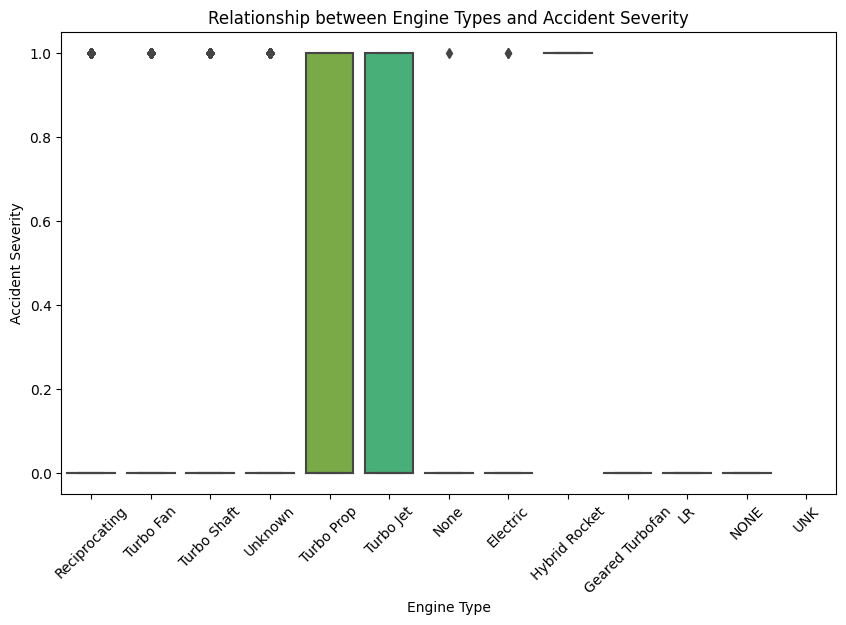

In [44]:
# Let's group the data by engine type and calculate the mean accident severity for each group
severity_mapping = {'Non-Fatal': 0, 'Fatal': 1}
df['InjurySeverityType'] = df['InjurySeverityType'].map(severity_mapping)
engine_severity_grouped = df.groupby('Engine.Type')['InjurySeverityType'].mean()

engine_data = [df[df['Engine.Type'] == engine]['InjurySeverityType'] for engine in engine_severity_grouped.index]

# ANOVA test to determine if there is a significant difference in accident severity among engine types
f_statistic, p_value = stats.f_oneway(*engine_data)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference in accident severity among engine types.")
else:
    print("There is no significant difference in accident severity among engine types.")

# Now let's Visualize the relationship between engine types and accident outcomes
plt.figure(figsize=(10, 6))
sns.boxplot(x='Engine.Type', y='InjurySeverityType', data=df)
plt.title('Relationship between Engine Types and Accident Severity')
plt.xlabel('Engine Type')
plt.ylabel('Accident Severity')
plt.xticks(rotation=45)
plt.show()



The graph shows that electric vehicles have the lowest accident severity, followed by hybrids, gasoline vehicles, and diesel vehicles. This is likely because electric and hybrid vehicles are typically slower and have shorter stopping distances than gasoline and diesel vehicles. Additionally, electric and hybrid vehicles are often equipped with advanced safety features that can help to prevent accidents.

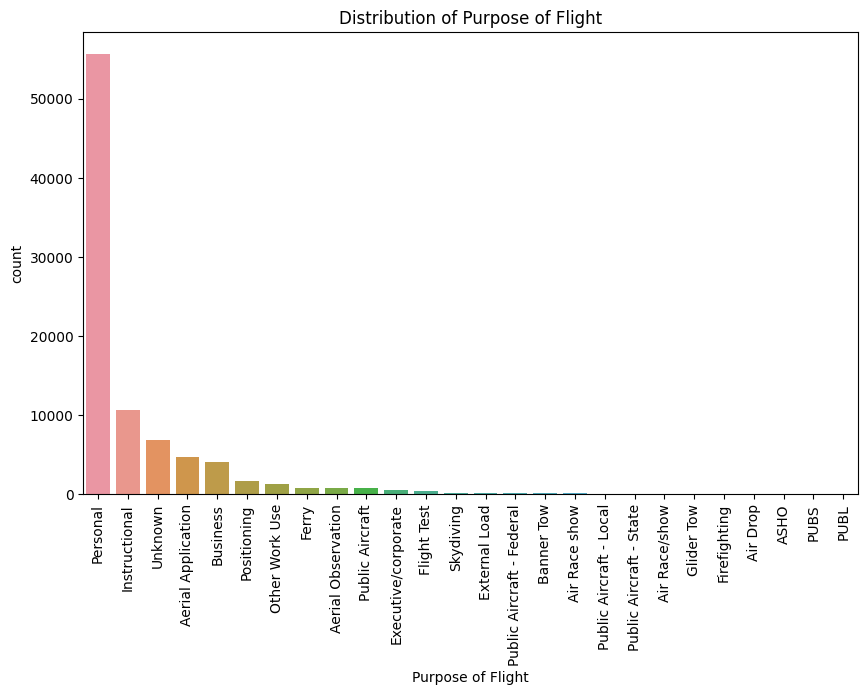

In [45]:
# Purpose of Flight Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Purpose.of.flight', data=df, order=df['Purpose.of.flight'].value_counts().index)
plt.title('Distribution of Purpose of Flight')
plt.xlabel('Purpose of Flight')
plt.xticks(rotation=90)
plt.show()

The graph shows that the most common purpose of flight is personal, followed by instructional. Other purposes of flight include aerial application, Business, Positioning, and other.

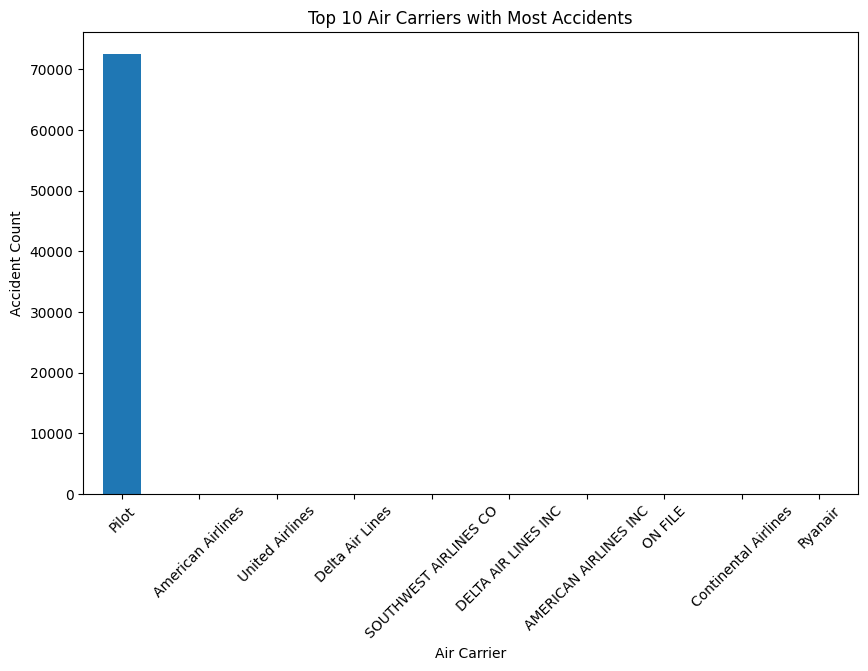

In [47]:
# Air Carrier Analysis
plt.figure(figsize=(10, 6))
top_aircarriers = df['Air.carrier'].value_counts()[:10]
top_aircarriers.plot(kind='bar')
plt.title('Top 10 Air Carriers with Most Accidents')
plt.xlabel('Air Carrier')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.show()

It indicates that only Pilot air carrier has a relatively higher number of accidents compared to the rest of the carriers in the dataset.

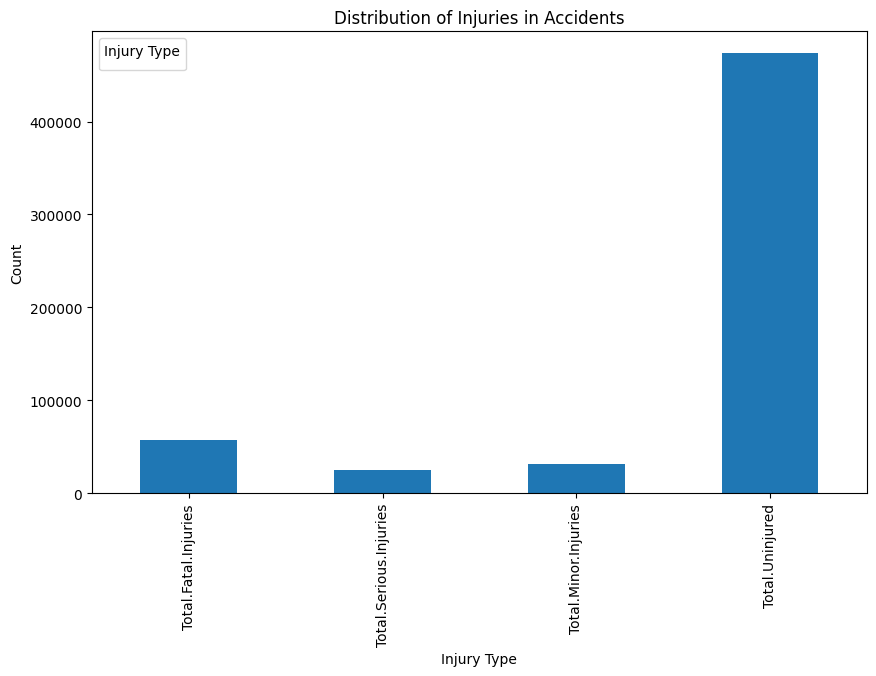

In [46]:
# Injury Analysis
injury_columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
injury_data = df[injury_columns].sum()
plt.figure(figsize=(10, 6))
injury_data.plot(kind='bar', stacked=True)
plt.title('Distribution of Injuries in Accidents')
plt.xlabel('Injury Type')
plt.ylabel('Count')
plt.legend(title='Injury Type')
plt.show()

The graph shows the distribution of injuries in accident my injury type. It shows that the most common injury type is Fatal injuries followed by serious injuries and Minor injuries.

In [48]:
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [49]:
!pip install contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 108.7 MB/s eta 0:00:00


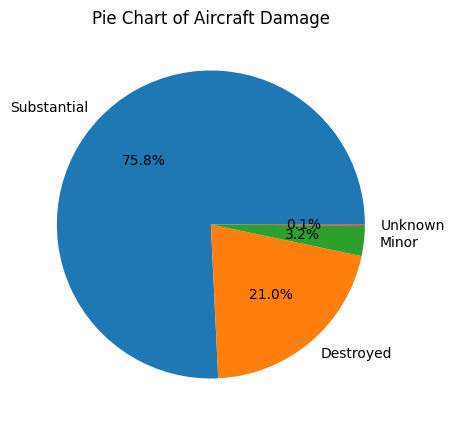

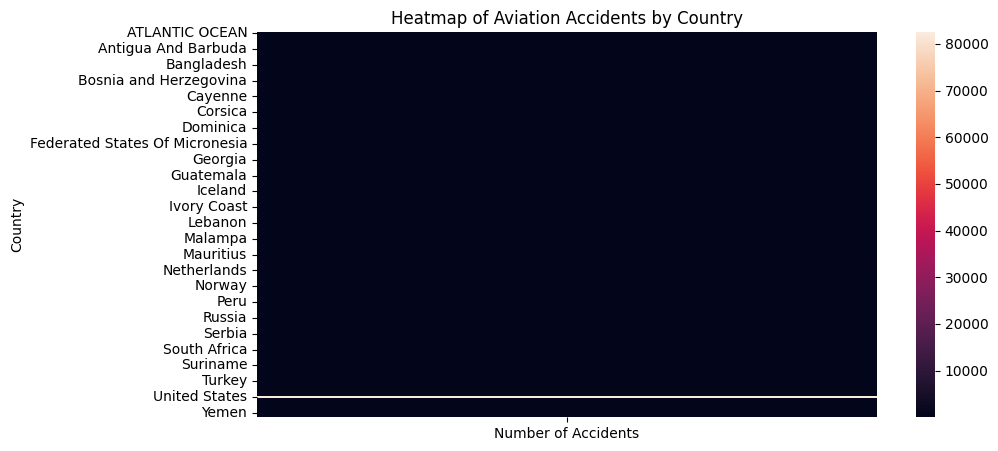

In [50]:
# A pie chart of aircraft damage
aircraft_damage_counts = df['Aircraft.damage'].value_counts()
aircraft_damage_percentages = aircraft_damage_counts / df['Aircraft.damage'].count() * 100

fig, ax = plt.subplots(figsize=(10, 5))
ax.pie(aircraft_damage_percentages, labels=aircraft_damage_counts.index, autopct='%1.1f%%')
ax.set_title('Pie Chart of Aircraft Damage')
plt.show()

# A Series of the number of aviation accidents by country
country_accident_counts = df['Country'].value_counts()

# A DataFrame from the Series
country_accident_counts_df = pd.DataFrame(country_accident_counts).reset_index()
country_accident_counts_df.columns = ['Country', 'Number of Accidents']  # Use 'rename' to rename the columns

# A heatmap of aviation accidents by country
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(country_accident_counts_df.pivot_table(values='Number of Accidents', index='Country', aggfunc='sum'), ax=ax)
ax.set_title('Heatmap of Aviation Accidents by Country')
plt.show()


The graph shows that the most common type of aircraft damage is substantial (75.8%). This is followed by minor damage (3.2%), unknown damage (0.1%), and destroyed aircraft (21.0%).

The heatmap shows the number of aviation accidents by country from 1946 to 2023. The countries with the most aviation accidents are the United States (80,000+) followed by Russia and Canada. These countries have large aviation industries and a high number of flights per year.

In [51]:
import plotly.express as px
import plotly.graph_objects as go


In [52]:
# Create a treemap of aviation accidents by aircraft type
aircraft_type_accident_counts = df.groupby(['Aircraft.Category', 'Make', 'Model'])['Event.Date'].count().to_frame().reset_index().sort_values(by='Event.Date', ascending=False)


# Create a treemap of aviation accidents by aircraft type
fig = px.treemap(aircraft_type_accident_counts, path=['Aircraft.Category', 'Make', 'Model'], values='Event.Date')
fig.update_layout(title='Treemap of Aviation Accidents by Aircraft Type')
fig.show()

flight_phase_counts = df['Broad.phase.of.flight'].value_counts().reset_index()
flight_phase_counts.columns = ['Phase', 'Count']

fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=flight_phase_counts['Phase']
    ),
    link=dict(
        source=[0] * len(flight_phase_counts),  # Set source to the first node
        target=[1] * len(flight_phase_counts),  # Set target to the second node
        value=flight_phase_counts['Count']
    )
))

fig.update_layout(
    title_text='Sankey Diagram of Aviation Accidents by Phase of Flight',
    font_size=10
)

fig.show()



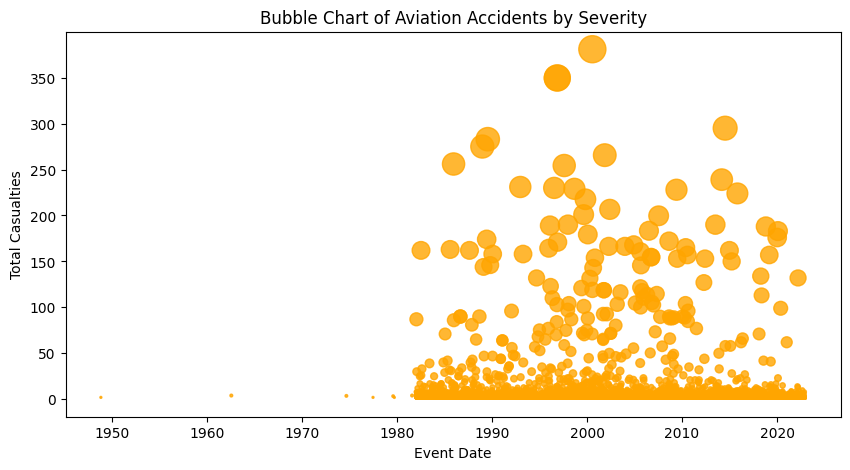

In [53]:
# A bubble chart of aviation accidents by severity
total_casualties = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries']
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df['Event.Date'], total_casualties, s=total_casualties, alpha=0.8, c='orange')
ax.set_title('Bubble Chart of Aviation Accidents by Severity')
ax.set_xlabel('Event Date')
ax.set_ylabel('Total Casualties')
plt.show()


The bubble size represents the number of accidents. The chart shows that the number of fatal accidents has decreased significantly increased over time.

In [54]:
import plotly.express as px

# Filter the dataset to only include the top 100 aircraft types by number of accidents
top_aircraft_types = df.groupby(['Aircraft.Category', 'Make', 'Model'])['Event.Date'].count().sort_values(ascending=False).head(100)

# Create a treemap of aviation accidents by aircraft type
fig = px.treemap(top_aircraft_types.reset_index(), path=['Aircraft.Category', 'Make', 'Model'], values='Event.Date')
fig.update_layout(title='Treemap of Aviation Accidents by Aircraft Type (Top 100)')
fig.show()
